# Crank Nicolson

$ u_j^n $

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

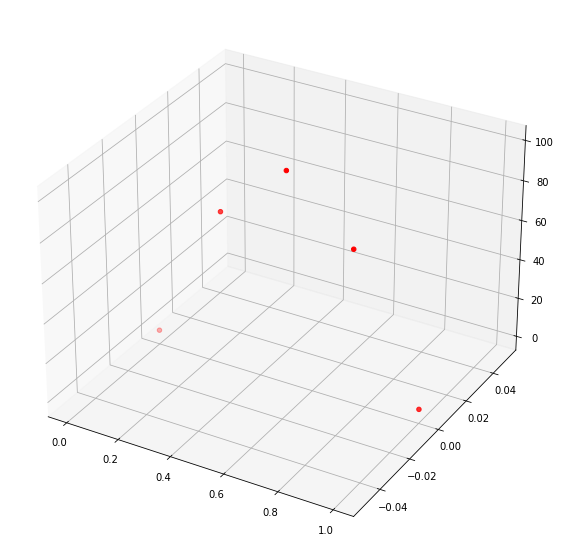

In [2]:
alfa = 0.02
l = 1
t_final = 6
quantidade_de_pontos = 5
x = np.linspace(0, l, quantidade_de_pontos)

delta_t = 0.1
delta_x = l / quantidade_de_pontos
quantidade_de_passos_de_tempo = int(t_final / delta_t) + 1
t = np.linspace(0, t_final, quantidade_de_passos_de_tempo)
linhas = quantidade_de_pontos - 2
colunas = quantidade_de_pontos - 2

v = (alfa * delta_t) / (2*delta_x ** 2)

u_num = np.zeros((quantidade_de_passos_de_tempo + 4, quantidade_de_pontos))
u_old = np.zeros(quantidade_de_pontos)
u_new = np.zeros(quantidade_de_pontos)

A = np.zeros((linhas + 1, colunas + 1))
C = np.zeros(linhas)

u_old[:] = 100 * np.sin(np.pi * x / l)
u_num[0, :] = u_old
u_new[:] = u_old

for i in range(0,linhas):
    A[i,i]   = 1+2*v
    A[i,i+1] = -v
    A[i,i-1] = -v
    
A = np.delete(A, (-1), axis=0)
A = np.delete(A, (-1), axis=1)

for n in range(0, quantidade_de_passos_de_tempo - 1):
    C[:] = u_old[1:-1] + v * (u_old[0]-2*u_old[1]+u_old[2])
    C[0] = C[0] + v * u_old[0]
    C[-1] = C[-1] + v * u_old[-1]

    u_new[1:-1] = np.linalg.solve(A, C)
    u_num[n + 1, :] = u_new
    u_old = u_new

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
for i in range(quantidade_de_passos_de_tempo):
    ax.scatter3D(x, t[i], u_num[i], color='red')
    plt.pause(0.1)
plt.show()



In [9]:
A.round(2)

array([[ 1.05, -0.02,  0.  ],
       [-0.02,  1.05, -0.02],
       [ 0.  , -0.02,  1.05]])